These all are the necessary imports

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s e

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import gradio as gr
import random
import numpy as np

This is the model architecture , its actually very simple model and can be made complex depending on the requirement

In [4]:
# class SimpleNN(nn.Module):
#     def __init__(self, hidden_units):
#         super(SimpleNN, self).__init__()
#         self.fc1 = nn.Linear(28*28, hidden_units)
#         self.fc2 = nn.Linear(hidden_units, 10)

#     def forward(self, x):
#         x = x.view(-1, 28*28)
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x


class SimpleCNN(nn.Module):
    def __init__(self, hidden_units):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

The basic preprocessing of data is done and also downloading part is also included

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 4
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainset = torch.utils.data.Subset(trainset, range(1000))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=False, transform=transform)
testset = torch.utils.data.Subset(testset, range(1000))
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5480847.12it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 158786.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1290068.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2515917.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Fairly simple visualization of the data is done in a batch size

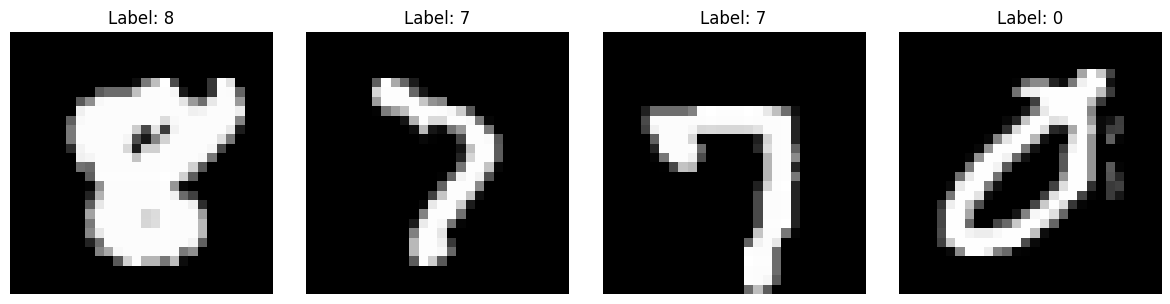

In [7]:
import matplotlib.pyplot as plt



def visualize_batch(data_loader, batch_size=16):
    images, labels = next(iter(data_loader))

    fig, axes = plt.subplots(1, batch_size, figsize=(12, 3))
    for i in range(batch_size):
        image = images[i].numpy().squeeze()
        label = labels[i].item()

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_batch(trainloader , batch_size)

In [8]:
len(trainloader)

250

The training process is done here and evaluation code is also written

In [9]:

def train_model(learning_rate, hidden_units, epochs):
    model = SimpleCNN(hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in trainloader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(100 * correct / total)

        # Evaluate on test data
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in testloader:
                output = model(images)
                _, predicted = torch.max(output, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracies.append(100 * correct / total)

    return model, train_losses, train_accuracies, test_accuracies


learning_rate = 0.001
hidden_units = 128
epochs = 5
train_model(learning_rate, hidden_units, epochs)

Epoch 1/5, Loss: 0.02272108383476734
Epoch 2/5, Loss: 0.16378022730350494
Epoch 3/5, Loss: 0.03677889704704285
Epoch 4/5, Loss: 0.008850425481796265
Epoch 5/5, Loss: 0.2863030731678009


(SimpleCNN(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=3136, out_features=128, bias=True)
   (fc2): Linear(in_features=128, out_features=10, bias=True)
 ),
 [0.9774996743723751,
  0.23331457841652445,
  0.14393383361503947,
  0.06193649616764742,
  0.04103323144410751],
 [68.9, 93.3, 95.7, 97.9, 98.5],
 [83.7, 85.9, 89.7, 93.7, 92.2])

After the training the evaluation is done and also the some visualization is shown

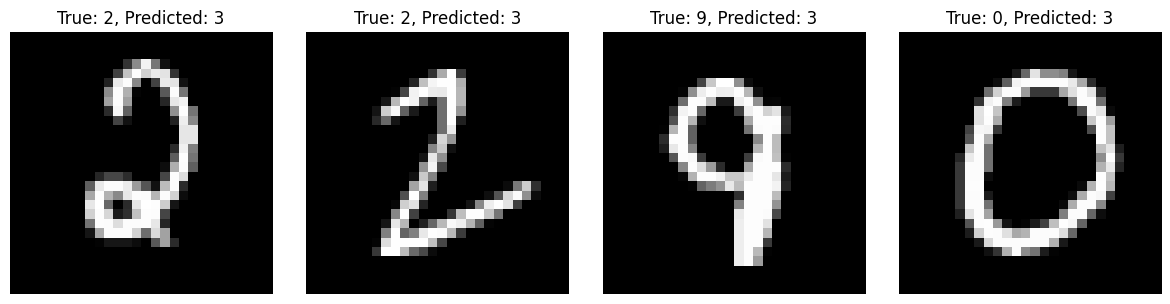

In [11]:
# model = SimpleNN(hidden_units)
model = SimpleCNN(hidden_units)
def evaluate_model(model, data_loader, batch_size=4):
    model.eval()
    images, labels = next(iter(data_loader))

    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, batch_size, figsize=(12, 3))
    for i in range(batch_size):
        image = images[i].numpy().squeeze()
        true_label = labels[i].item()
        predicted_label = predicted[i].item()

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'True: {true_label}, Predicted: {predicted_label}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


evaluate_model(model, testloader, batch_size)


In [12]:
# # Evaluation loop
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for images, labels in testloader:
#         output = model(images)
#         _, predicted = torch.max(output.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy: {100 * correct / total}%')


The visualizations in gradio as shown in tensorboard

In [13]:
import gradio as gr

def visualize_weights(model):
    weights = model.fc1.weight.data.numpy()
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[0]:
            ax.imshow(weights[i].reshape(28, 28), cmap='viridis')
        ax.axis('off')
    plt.show()
    return fig

def predict_digit(model, image):
    transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    image = transform(image).unsqueeze(0)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()


def evaluate_and_visualize(model, data_loader, batch_size=4):
    model.eval()
    images, labels = next(iter(data_loader))

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, batch_size, figsize=(12, 3))
    for i in range(batch_size):
        image = images[i].numpy().squeeze()
        true_label = labels[i].item()
        predicted_label = predicted[i].item()

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'True: {true_label}\nPred: {predicted_label}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    return fig

def gradio_interface():
    return evaluate_and_visualize(model, testloader, batch_size=4)

interface = gr.Interface(fn=gradio_interface, inputs=[], outputs="plot")

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://037b2d8aadd7cae893.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [18]:
def visualize_weights(model):
    weights = model.conv1.weight.data.cpu().numpy()
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < weights.shape[0]:
            ax.imshow(weights[i, 0, :, :], cmap='viridis')
        ax.axis('off')
    plt.show()
    return fig

# Visualization function for loss and accuracy
def visualize_training(train_losses, train_accuracies, test_accuracies):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].plot(train_losses, label='Training Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Training Loss')
    ax[0].legend()

    ax[1].plot(train_accuracies, label='Training Accuracy')
    ax[1].plot(test_accuracies, label='Test Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy (%)')
    ax[1].set_title('Training and Test Accuracy')
    ax[1].legend()

    plt.show()
    return fig

# Custom digit input and prediction
def predict_digit(model, image):
    transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    image = transform(image).unsqueeze(0)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()

# Define a Gradio interface function
def gradio_interface(learning_rate, hidden_units, epochs):
    model, train_losses, train_accuracies, test_accuracies = train_model(learning_rate, hidden_units, epochs)
    fig_weights = visualize_weights(model)
    fig_training = visualize_training(train_losses, train_accuracies, test_accuracies)
    return  fig_weights , fig_training

# Create Gradio interface
interface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Slider(0.0001, 0.01, step=0.0001, label="Learning Rate"),
        gr.Slider(10, 200, step=10, label="Number of Hidden Units"),
        gr.Slider(1, 10, step=1, label="Epochs")
    ],
    outputs=[gr.Plot() ,  gr.Plot()],
    live=True
)


# Combine both interfaces
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://941fd6cb64e457bb45.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
